# Regression Project

In this notebook, I attempt to find a model for the data in the file, "linear_regression_hw.csv," by plotting the model side-by-side with the residual values of the function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d # needed for 3d plotting
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats

%matplotlib inline

Define my customized function to plot fit data and residual side by side:
* subplot #1: plot the raw data (x vs y) and the fit (x vs yfit)
* subplot #2: plot the residual (x vs residual)

In [2]:
def plot_fit_data(x,y,yfit,size=1000,linewidth=10,fontsize=70,title1="data fitting",title2="residual"):

    # calculate residual
    residual = y-yfit

    # Create a Figure and subplot objects
    fig = plt.figure(figsize=(100,30))
    ax1 = fig.add_subplot(1,2,1)             
    ax2 = fig.add_subplot(1,2,2)             

    # Plot the data and the best fit line
    ax1.scatter(x, y, c='b',s=size)
    ax1.plot(x, yfit, 'k', linewidth=linewidth)
    ax1.set_title(title1,fontsize=fontsize)
    plt.xlabel('x')
    ax1.autoscale(tight=True)

    # Plot the residuals
    ax2.scatter(x, residual, c='r', s=size)
    ax2.plot([0,max(x)],[0,0], c='k', linewidth=linewidth)
    ax2.set_title(title2, fontsize = fontsize) 
    ax2.autoscale(tight=True)
    plt.xlabel('x')
    plt.ylabel('residual')
    plt.show()
    

def ttest_residual(dy):
    s1 = dy[0:len(dy)/2]
    s2 = dy[len(dy)/2:len(dy)]
    t_res,t_p = stats.ttest_ind(s1,s2)
    return t_p

## First import the raw data, and plot it to get an idea of what trend the data follows


y datatype is  <class 'numpy.ndarray'>


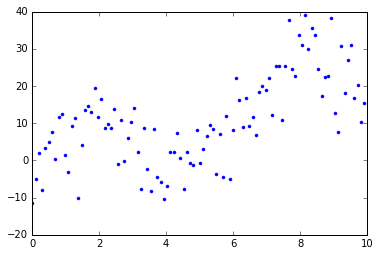

In [3]:
# read the csv file 
df = pd.read_csv("linear_regression_hw.csv")
x = df['x'].reshape(-1,1)                                   
y = df['y'].reshape(-1,1)                        
print ('y datatype is ',type(y))

# plot the raw data to see how it looks like
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x,y, 'b.')
plt.show()

## Using a line to model data
$y = m_1x + b $

I first attempt to fit the data with a line, and then side-by-side plot the residual plot, $x_i$ versus $\widehat{y}_i - y_i$.  Since I am not seeing random noise (the residual seems to follow a sine or cosine function), this line is not a very good model

Slope: 2.59792433739 Intercept: -2.08256411909


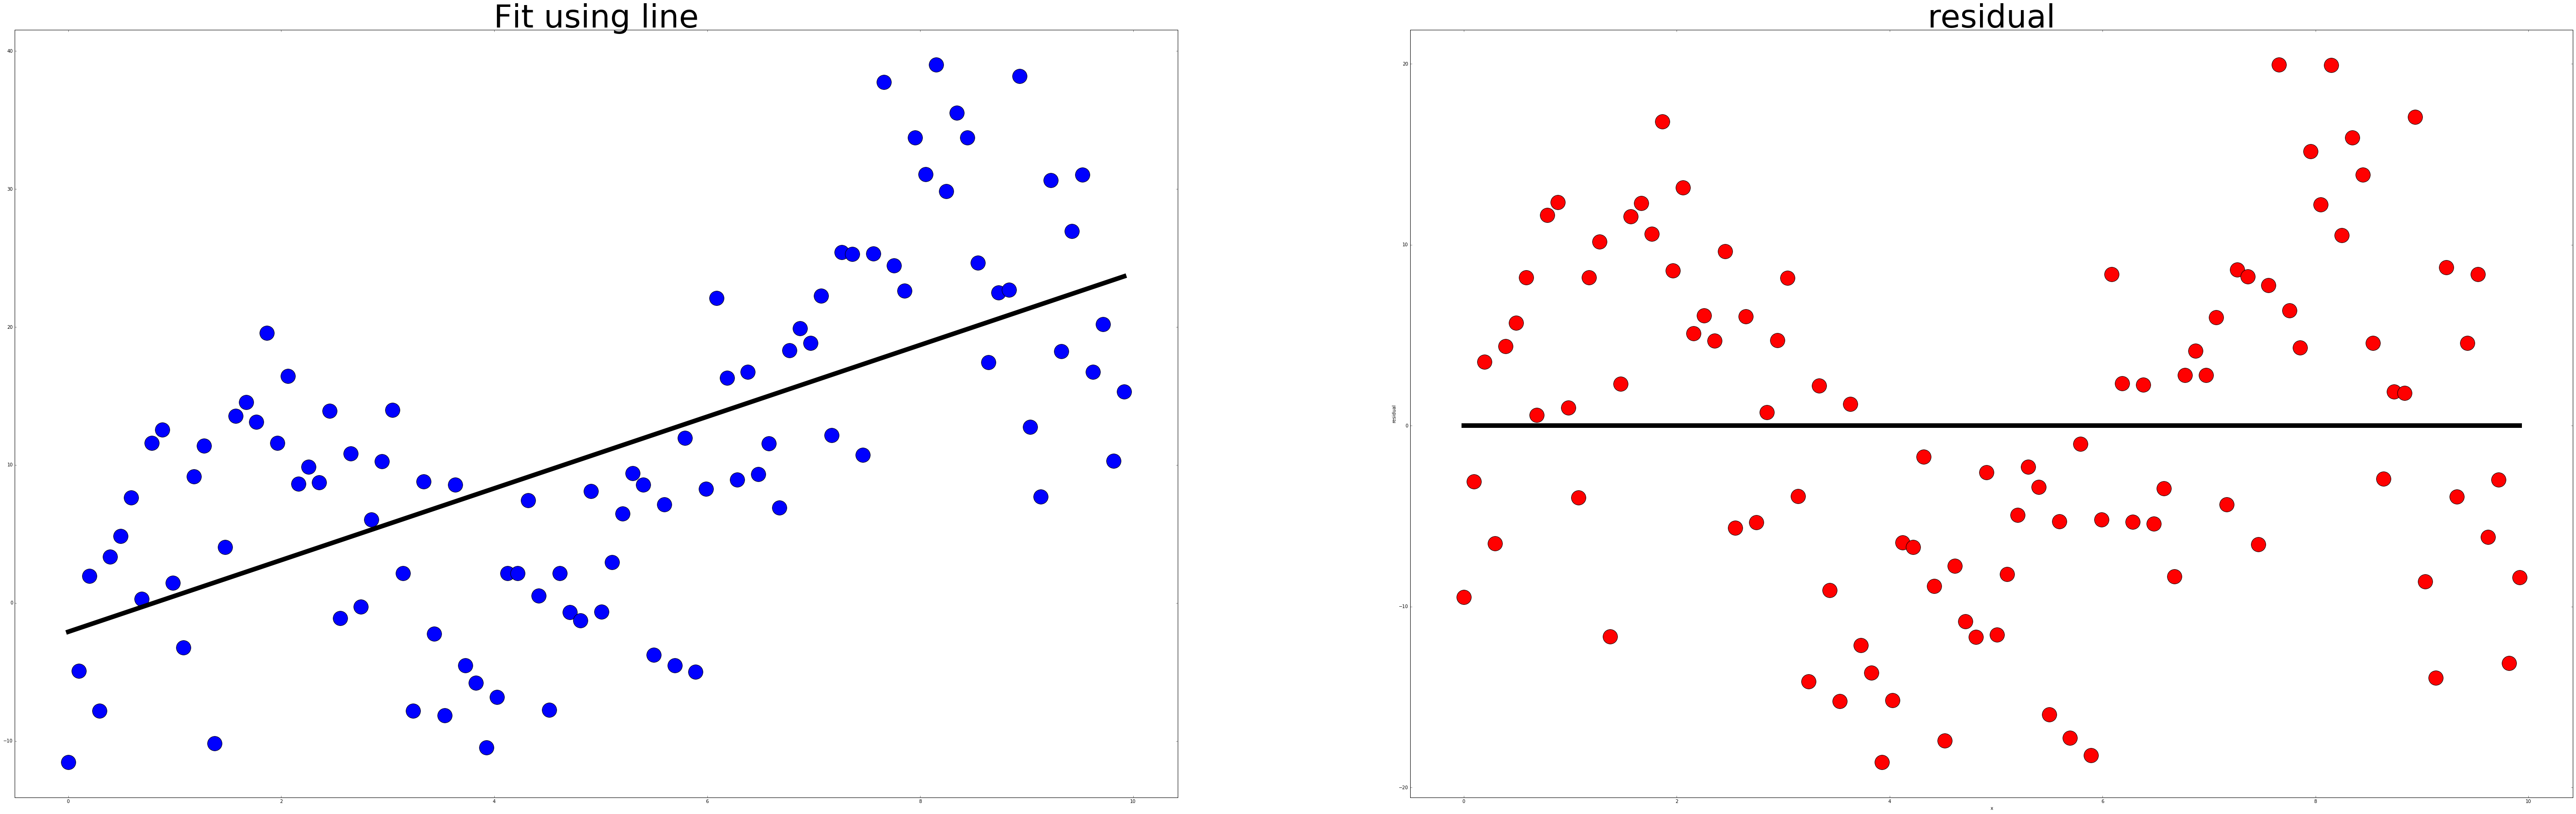

In [4]:
# perform linear regression using model y1_fit
linreg = LinearRegression()
linreg.fit(x,y)

# get the fit results
m1 = linreg.coef_[0][0]                    
b = linreg.intercept_[0]
print("Slope:", m1, "Intercept:", b)

# calculate residiual
y1_fit = m1*x+b                          
dy1   = y-y1_fit                          

# call the plot function to plot the results
plot_fit_data(x,y,y1_fit,title1 = "Fit using line")

Use t-test to show that the model is not good

In [5]:
p_value = ttest_residual(dy1)
print ('p-values from t-test= ',p_value)

p-values from t-test=  [ 0.50588769]


C:\Users\jocel\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\jocel\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# Using a polynomial to model the data
$m_2 x^2 + m_1 x + b = y$

Create a two-dimensional data frame in panda, with the function, w, being x^2

In [6]:
df = pd.DataFrame(x, columns = ['x'])
df['w (x^2)'] = df['x']**2
df.head()

,x,w (x^2)
0,0.000000,0.000000
1,0.098175,0.009638
2,0.196350,0.038553
3,0.294524,0.086745
4,0.392699,0.154213


Perform the fit, calculate fit results

y2_fit=0.360857291039*x^2+-0.980210914697*x+3.77214599627


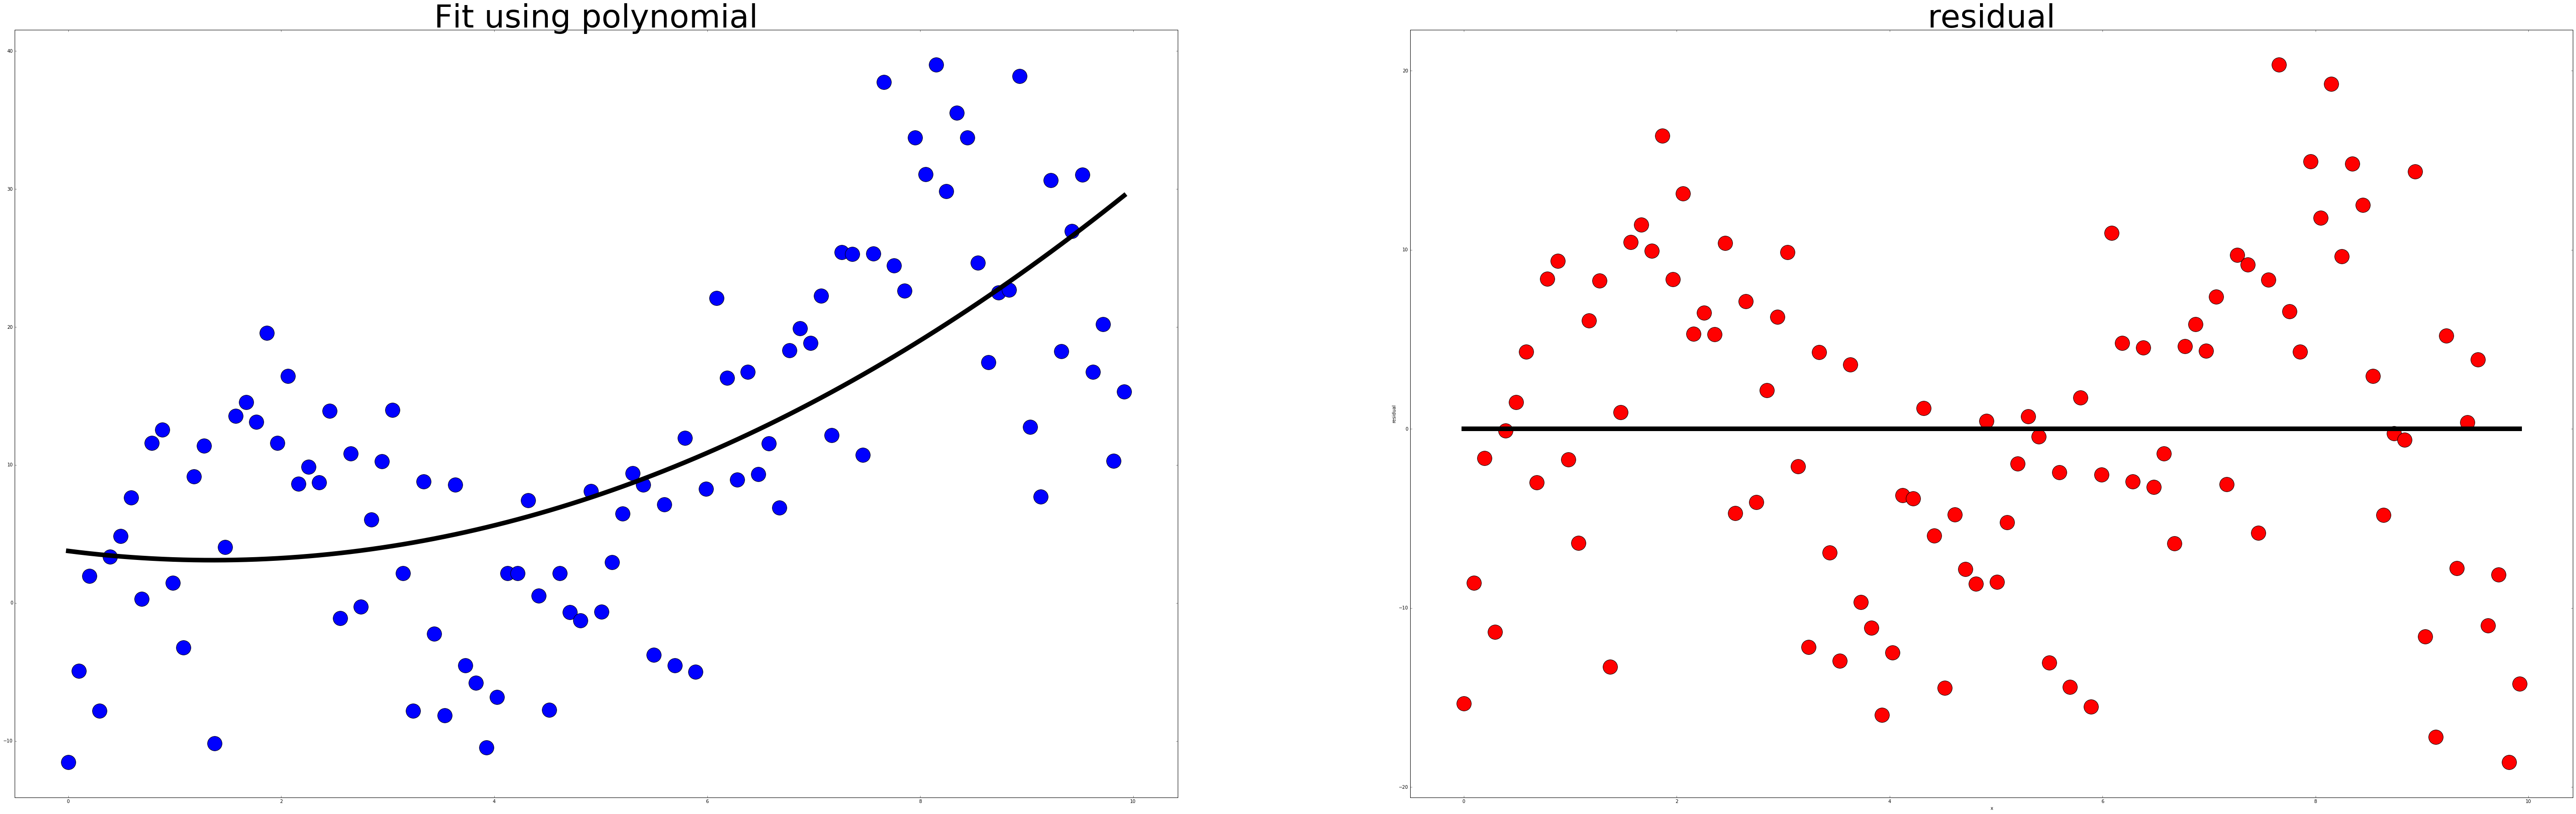

In [7]:
# perform linear regression using model y2_fit
linreg.fit(df.values, y) 

# get the fit results
m1, m2 = linreg.coef_[0]
b = linreg.intercept_[0]
print("y2_fit="+str(m2)+'*x^2+'+str(m1)+'*x+'+str(b))

# calcuate ys_fit and residiual dy1using numpy array operation directly
y2_fit = m2*x**2+m1*x+b                   
dy2   = y-y2_fit                         

# call the plot function to plot the results
plot_fit_data(x,y,y2_fit,title1="Fit using polynomial")


In [8]:
p_value = ttest_residual(dy2)
print ('p-values from t-test= ',p_value)

p-values from t-test=  [ 0.48735437]


C:\Users\jocel\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\jocel\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


## Using trig functions to model the data
$Asin(B x + C) + D = y$

Create a two-dimensional data frame, this time using the function g, which is sin(x)

In [9]:
df = pd.DataFrame(x, columns = ['x'])
df['g (sin(x))'] = np.sin(df['x'])
df.head()

,x,g (sin(x))
0,0.000000,0.000000
1,0.098175,0.098017
2,0.196350,0.195090
3,0.294524,0.290285
4,0.392699,0.382683


In [15]:
y

array([[-11.54811876],
       [ -4.91478435],
       [  1.96087895],
       [ -7.823953  ],
       [  3.34074721],
       [  4.86525862],
       [  7.64042081],
       [  0.28241773],
       [ 11.59829248],
       [ 12.56877687],
       [  1.45336335],
       [ -3.23870474],
       [  9.16237077],
       [ 11.39826258],
       [-10.16548843],
       [  4.04893583],
       [ 13.56048559],
       [ 14.54390673],
       [ 13.11222766],
       [ 19.56601067],
       [ 11.58774243],
       [ 16.43461259],
       [  8.63955237],
       [  9.87392314],
       [  8.73791584],
       [ 13.92713561],
       [ -1.08758371],
       [ 10.83556362],
       [ -0.2744814 ],
       [  6.05838568],
       [ 10.2779327 ],
       [ 14.00112385],
       [  2.17367116],
       [ -7.80100195],
       [  8.79684643],
       [ -2.24076997],
       [ -8.13584606],
       [  8.56026495],
       [ -4.52993507],
       [ -5.79538269],
       [-10.48354742],
       [ -6.80897064],
       [  2.16917324],
       [  2

y3_fit=9.87117367801*sin(x) + 2.73612564021*x+-4.59855405391


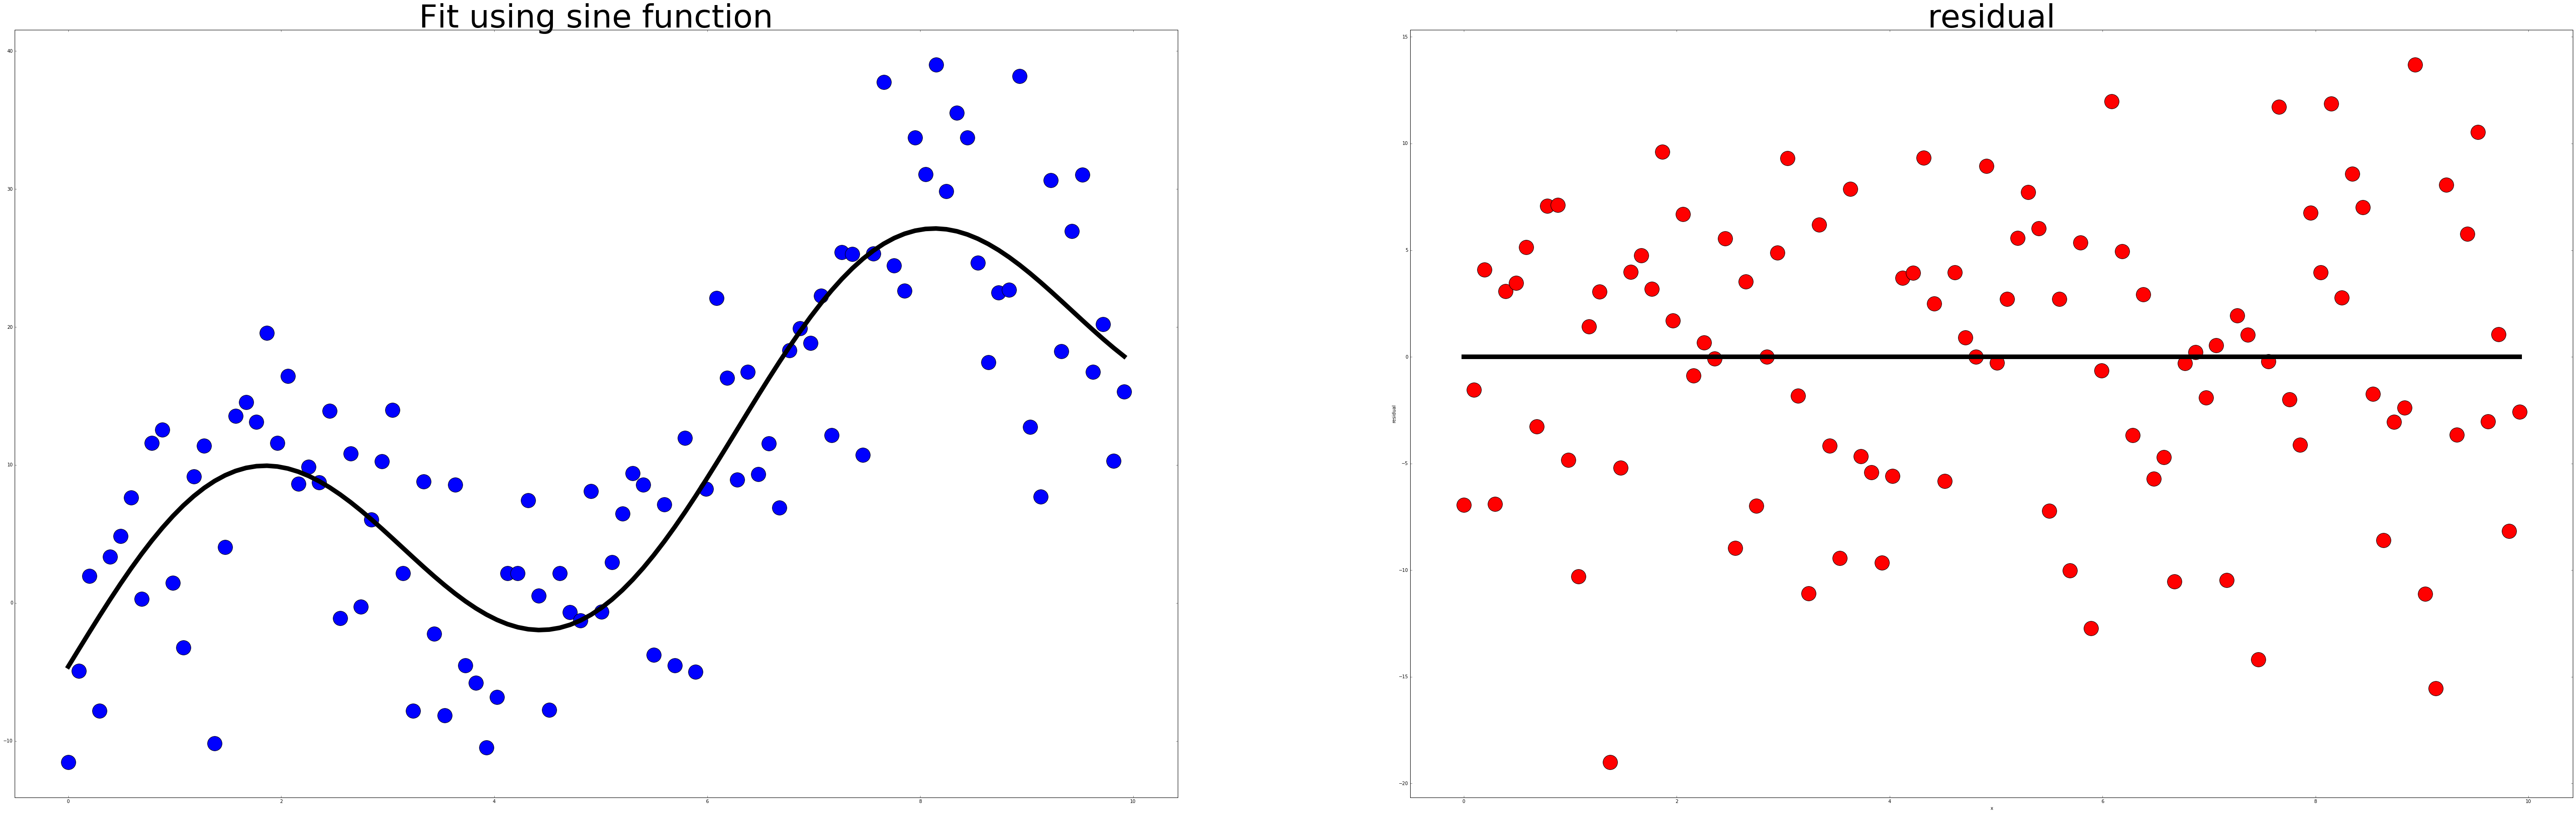

In [10]:
# perform linear regression using model y3_fit m2*sin(x) +m1*x +b
linreg.fit(df.values, y) 
m1= linreg.coef_[0][0]
m2 = linreg.coef_[0][1]
b = linreg.intercept_[0]
print("y3_fit="+str(m2)+'*sin(x) + '+str(m1)+'*x+'+str(b))

# calcuate y3_fit and residiual dy1using numpy array operation directly
y3_fit = m2*np.sin(x)+m1*x+b               
dy3   = y-y3_fit                        

# call the plot function to plot the results
plot_fit_data(x,y,y3_fit,title1="Fit using sine function")


In [11]:
p_value = ttest_residual(dy3)
print ('p-values from t-test= ',p_value)

p-values from t-test=  [ 0.92926406]


C:\Users\jocel\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\jocel\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
